In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
sn.set(font_scale=1.5)
%matplotlib inline

In [2]:
import statsmodels
print(statsmodels.__version__)

0.13.2


In [13]:
unem_orig = pd.read_csv('https://raw.githubusercontent.com/yanqizeng/qm_assessment/main/GT_selected_12_3_2.csv')
unem_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   lsoa                                         4835 non-null   object 
 1   names                                        4835 non-null   object 
 2   unemployment_rate                            4835 non-null   float64
 3   couple_household_without_dependent_children  4835 non-null   float64
 4   lone_parent_household                        4835 non-null   float64
 5   ethnic_white                                 4835 non-null   float64
 6   ethnic_black                                 4835 non-null   float64
 7   tenurec_owned_outright                       4835 non-null   float64
 8   tenurtc_social_rented                        4835 non-null   float64
 9   good_health                                  4835 non-null   float64
 10  

In [14]:
unem_orig.head()

,lsoa,names,unemployment_rate,couple_household_without_dependent_children,lone_parent_household,ethnic_white,ethnic_black,tenurec_owned_outright,tenurtc_social_rented,good_health,bad_health
0,E01000907,Camden 001A,9.9000,20.1000,21.1000,73.5000,7.9000,12.6000,54.4000,78.0000,8.7000
1,E01000908,Camden 001B,8.0000,17.3000,13.2000,72.4000,8.0000,14.0000,52.6000,78.2000,9.4000
2,E01000909,Camden 001C,4.9000,29.3000,7.3000,84.1000,2.9000,38.3000,18.6000,85.6000,4.5000
3,E01000912,Camden 001D,8.8000,16.6000,15.7000,77.3000,9.2000,15.3000,51.3000,77.2000,8.2000
4,E01000913,Camden 001E,2.1000,34.6000,3.7000,88.2000,1.3000,47.1000,1.9000,89.6000,3.1000


In [15]:
unem_orig_x = unem_orig.iloc[:,3:12]

In [16]:
unem_orig_xy = unem_orig.iloc[:,0:12]

In [17]:
unem_orig_x.head()

,couple_household_without_dependent_children,lone_parent_household,ethnic_white,ethnic_black,tenurec_owned_outright,tenurtc_social_rented,good_health,bad_health
0,20.1000,21.1000,73.5000,7.9000,12.6000,54.4000,78.0000,8.7000
1,17.3000,13.2000,72.4000,8.0000,14.0000,52.6000,78.2000,9.4000
2,29.3000,7.3000,84.1000,2.9000,38.3000,18.6000,85.6000,4.5000
3,16.6000,15.7000,77.3000,9.2000,15.3000,51.3000,77.2000,8.2000
4,34.6000,3.7000,88.2000,1.3000,47.1000,1.9000,89.6000,3.1000


In [8]:
unem_orig_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   couple_household_without_dependent_children  4835 non-null   float64
 1   lone_parent_household                        4835 non-null   float64
 2   ethnic_white                                 4835 non-null   float64
 3   ethnic_black                                 4835 non-null   float64
 4   ethnic_bame                                  4835 non-null   float64
 5   tenurec_owned_outright                       4835 non-null   float64
 6   tenurtc_social_rented                        4835 non-null   float64
 7   good_health                                  4835 non-null   float64
 8   bad_health                                   4835 non-null   float64
dtypes: float64(9)
memory usage: 340.1 KB


****Correlation Analysis****

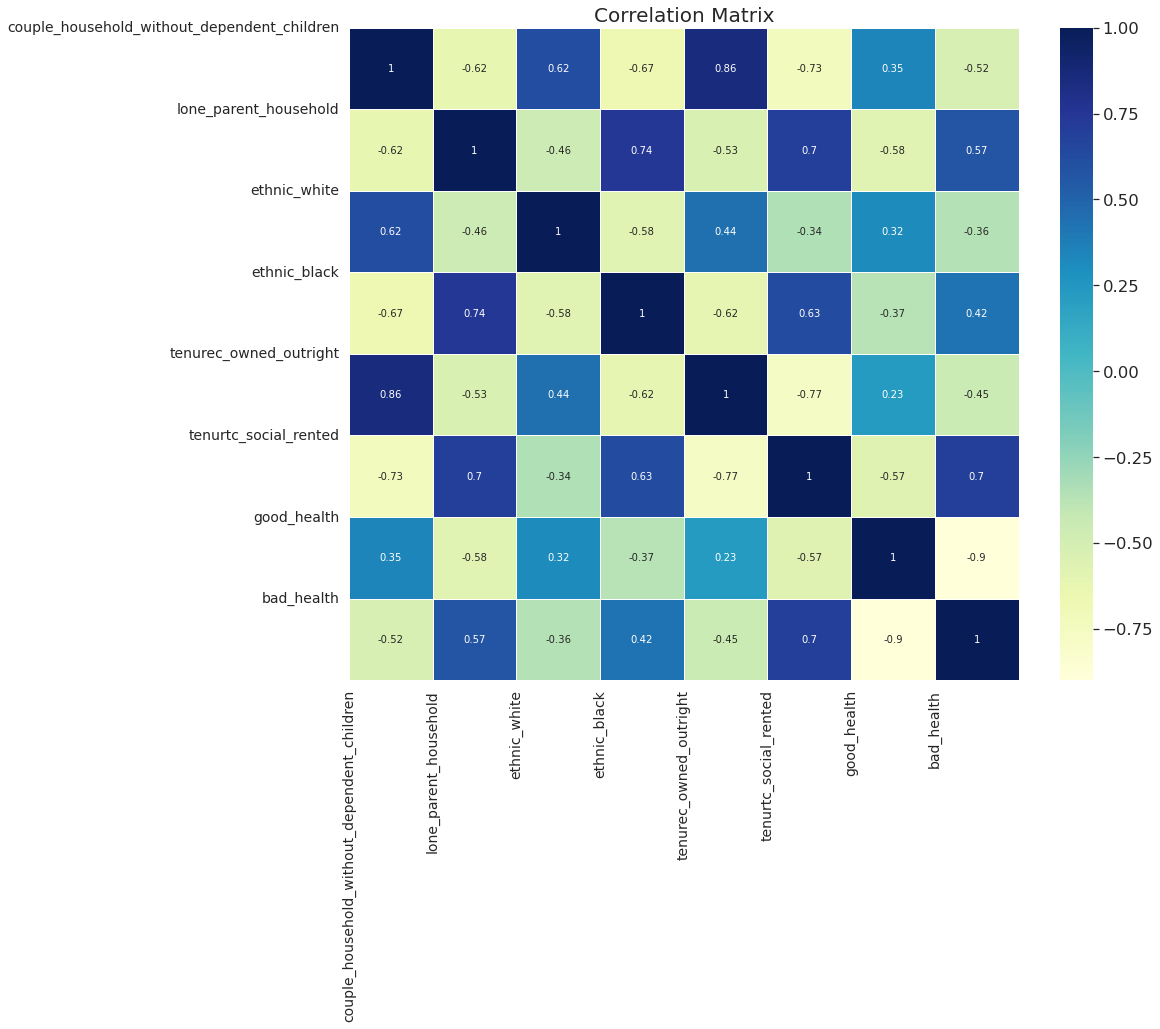

In [18]:
df = unem_orig_x
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 12))
sn.heatmap(df.corr(),annot=True,linewidth=.5,cmap='YlGnBu')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
plt.title('Correlation Matrix',fontsize=20)
plt.show()
#plt.savefig("Correlation Heatmap", dpi=300, bbox_inches = "tight") #,transparent=True

****VIF****

In [19]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [20]:
unem_orig_x.columns

Index(['couple_household_without_dependent_children', 'lone_parent_household',
       'ethnic_white', 'ethnic_black', 'tenurec_owned_outright',
       'tenurtc_social_rented', 'good_health', 'bad_health'],
      dtype='object')

In [21]:
# using VIF on the dataset
df_predictors_selected_VIF = drop_column_using_vif_(unem_orig_x)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: bad_health
Dropping: couple_household_without_dependent_children
The columns remaining after VIF selection are:
Index(['lone_parent_household', 'ethnic_white', 'ethnic_black',
       'tenurec_owned_outright', 'tenurtc_social_rented', 'good_health'],
      dtype='object')


In [22]:
model_unem_orig = sm.OLS(endog=unem_orig_xy[['unemployment_rate']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_unem_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      unemployment_rate   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     3339.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:44:12   Log-Likelihood:                -8829.7
No. Observations:                4835   AIC:                         1.767e+04
Df Residuals:                    4828   BIC:                         1.772e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21.3526      0.708     30.177      0.000      19.965      22.740
lone_parent_household      0.1539      0.006     24.562      0.000       0.142       0.166
ethnic_white              -0.0430      0.001    -30.912      0.000      -0.046      -0.040
ethnic_black               0.0252      0.003      7.467      0.000       0.019       0.032
tenurec_owned_outright    -0.0312      0.003     -9.808      0.000      -0.037      -0.025
tenurtc_social_rented      0.0378      0.002     16.138      0.000       0.033       0.042
good_health               -0.1648      0.008    -21.476      0.000      -0.180      -0.150
==============================================================================
Omnibus:                      894.904   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4463.407
Skew:                           0.802   Prob(JB):                         0.00
Kurtosis:                       7.425   Cond. No.                     3.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

****Residual****

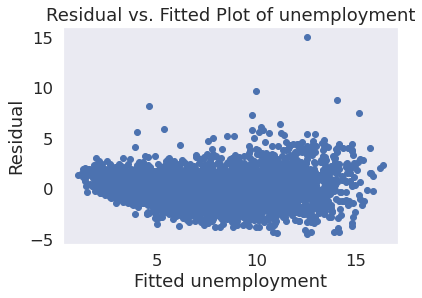

In [14]:
# plot 
plt.scatter(model_unem_orig.fittedvalues, model_unem_orig.resid)
# adding title and labels
plt.xlabel('Fitted unemployment')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment')
plt.show()

In [ ]:
#后面还要跟一个Harvery Collier test来检验模型是否线性，我还没弄完